<a href="https://colab.research.google.com/github/jear2412/MCMC/blob/master/HMC-TF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from mpl_toolkits import mplot3d
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:

tfd = tfp.distributions
dtype = tf.float32
def unnormalized_log_prob(x):
  return -x - x**2.

# Geometric decay is a good rule of thumb.
inverse_temperatures = 0.5**tf.range(4, dtype=dtype)

# If everything was Normal, step_size should be ~ sqrt(temperature).
step_size = 0.5 / tf.sqrt(inverse_temperatures)

def make_kernel_fn(target_log_prob_fn, seed):
  return tfp.mcmc.HamiltonianMonteCarlo(
      target_log_prob_fn=unnormalized_log_prob,
      seed=seed, step_size=step_size, num_leapfrog_steps=3)



In [0]:

remc = tfp.mcmc.ReplicaExchangeMC(
    target_log_prob_fn= unnormalized_log_prob ,
    inverse_temperatures=inverse_temperatures,
    make_kernel_fn=make_kernel_fn)

def trace_swaps(unused_state, results):
  return (results.is_swap_proposed_adjacent,
          results.is_swap_accepted_adjacent)



In [0]:
samples, is_swap_proposed_adjacent = (
    tfp.mcmc.sample_chain(
        num_results=1000,
        current_state=1.0,
        kernel=remc,
        num_burnin_steps=500,
        trace_fn=trace_swaps)
)



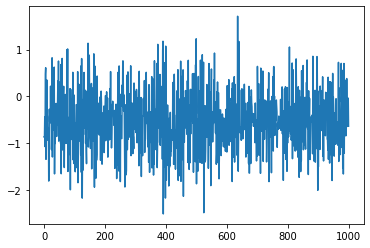

In [10]:
plt.plot(samples)

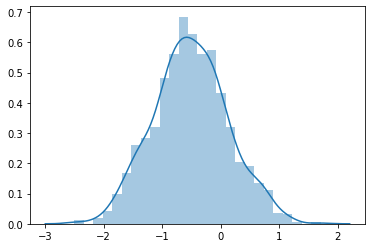

In [11]:
sns.distplot(samples)